In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


In [5]:
# Read in your csv file that has the mid features. 

#data = pd.read_csv('../Feature Extraction/midFeaturesTrainSet.csv')
data = pd.read_csv('../Data/Mid_features/midFeaturesTrainFinal.csv')
print(data.shape)

(4876, 140)


In [7]:
data.head()

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,1001_DFA_ANG_XX,1001,ANG,DFA,0.159956,0.012981,2.988679,0.250490,0.224054,1.342449,...,0.024107,0.014803,0.017961,0.013412,0.008655,0.010352,0.009738,0.010600,0.004328,0.009167
1,1001_DFA_DIS_XX,1001,DIS,DFA,0.175069,0.006502,2.930843,0.258174,0.209151,1.423432,...,0.022395,0.015510,0.008768,0.014533,0.009661,0.002533,0.004223,0.007513,0.003662,0.007296
2,1001_DFA_FEA_XX,1001,FEA,DFA,0.199849,0.016796,2.999322,0.272570,0.202443,1.399237,...,0.007043,0.003129,0.006915,0.007791,0.013899,0.005247,0.003474,0.014306,0.005781,0.008250
3,1001_DFA_HAP_XX,1001,HAP,DFA,0.148663,0.007960,2.880264,0.235750,0.211387,1.292553,...,0.021737,0.005675,0.009277,0.026797,0.010147,0.010658,0.017229,0.013203,0.010011,0.007488
4,1001_DFA_NEU_XX,1001,NEU,DFA,0.174283,0.010704,2.833565,0.256034,0.201942,1.413561,...,0.031970,0.012929,0.017969,0.037496,0.013379,0.008354,0.005615,0.008907,0.007483,0.013592


In [8]:
# Split the data into train and test set, stratified by Emotion.
data_train, data_test = train_test_split(data.copy(),
                                   shuffle=True,
                                   random_state=608,
                                   stratify=data.Emotion,
                                   test_size=0.2
                                   )

In [9]:
data.sample(5)

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
1494,1026_IWW_FEA_XX,1026,FEA,IWW,0.132852,0.036801,2.830103,0.219037,0.204199,0.872083,...,0.006967,0.010807,0.015627,0.012201,0.005183,0.014491,0.031875,0.026645,0.011281,0.009715
4756,1090_ITH_DIS_XX,1090,DIS,ITH,0.126339,0.014582,2.701708,0.200625,0.197684,0.847034,...,0.015411,0.023725,0.016644,0.011734,0.005789,0.009850,0.012348,0.016882,0.008266,0.009346
2312,1045_TAI_NEU_XX,1045,NEU,TAI,0.134067,0.018822,2.970854,0.209617,0.202451,0.734567,...,0.026269,0.019628,0.024504,0.025168,0.021435,0.012779,0.010485,0.008460,0.003585,0.010777
4554,1086_ITH_ANG_XX,1086,ANG,ITH,0.155071,0.008291,2.829158,0.267097,0.224797,1.216080,...,0.008827,0.016315,0.012629,0.013306,0.010377,0.012445,0.015485,0.038669,0.021651,0.009574
899,1017_IWW_NEU_XX,1017,NEU,IWW,0.130216,0.012241,2.925080,0.209409,0.196613,0.702811,...,0.007747,0.018423,0.014903,0.008141,0.011615,0.024101,0.028292,0.027691,0.013409,0.011326


In [10]:
# Check the percentages of the different emotion categories in the training set

data_train.Emotion.value_counts(normalize=True)

NEU    0.178718
HAP    0.164359
FEA    0.164359
ANG    0.164359
SAD    0.164103
DIS    0.164103
Name: Emotion, dtype: float64

In [11]:
# Check the percentages of the different emotion categories in the test set

data_test.Emotion.value_counts(normalize=True)

NEU    0.179303
DIS    0.164959
ANG    0.163934
SAD    0.163934
FEA    0.163934
HAP    0.163934
Name: Emotion, dtype: float64

In [12]:
y_train = data_train[['Emotion']]
y_test  = data_test[['Emotion']]

X_train = data_train.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])
X_test  = data_test.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

In [13]:
y_test

,Emotion
2589,DIS
628,DIS
3624,ANG
334,ANG
2033,SAD
...,...
4030,ANG
614,SAD
2150,ANG
4016,NEU


In [14]:
# Add a column to the y vectors encoding each of the emotions.

y_train_dummies = pd.get_dummies(y_train)
y_train         = pd.concat([y_train, y_train_dummies], axis=1)
y_train["Emotion_ALL"]  = 1*y_train["Emotion_NEU"] + 2*y_train["Emotion_ANG"] + 3*y_train["Emotion_HAP"] + 4*y_train["Emotion_SAD"] + 5*y_train["Emotion_FEA"] + 6*y_train["Emotion_DIS"]
y_train = y_train.drop(columns  = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])

y_test_dummies = pd.get_dummies(y_test)
y_test         = pd.concat([y_test, y_test_dummies], axis=1)
y_test["Emotion_ALL"]  = 1*y_test["Emotion_NEU"] + 2*y_test["Emotion_ANG"] + 3*y_test["Emotion_HAP"] + 4*y_test["Emotion_SAD"] + 5*y_test["Emotion_FEA"] + 6*y_test["Emotion_DIS"]
y_test  = y_test.drop(columns   = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


no PCA
confusion matrix for all six emotions of the test set is:
[[83  6 13 26 21 26]
 [17 89 11  2 17 24]
 [26 30 42 15 32 15]
 [31  3  2 67 32 25]
 [17 16 20 25 64 18]
 [35 24 19 23 18 42]]

confusion matrix for all six emotions of the train set is:
[[565  17  18  26  26  45]
 [ 32 517  25   7  19  41]
 [ 46  52 450  23  26  44]
 [ 72   9  11 490  22  36]
 [ 19  28  32  47 490  25]
 [ 55  35  24  38  32 456]]


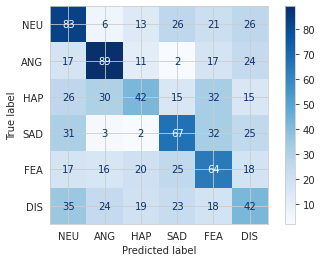

accuracy = 0.39651639344262296


In [15]:
# Build pipeline to first scale the mid feature data, then apply the SVC

pipe100 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier100 = pipe100.fit(X_train, y_train)
pred100       = pipe100.predict(X_test)    

# Look at the confusion matrix for the test data :
cnf_matrix_test100 = confusion_matrix(y_test, pred100)

print("no PCA")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test100)
print()

# Look at the confusion matrix for the training data:
pred_train100       = pipe100.predict(X_train)
cnf_matrix_train100 = confusion_matrix(y_train, pred_train100)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train100)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier100, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()



acc100 = np.diag(cnf_matrix_test100).sum()/cnf_matrix_test100.sum() 
print("accuracy =", acc100)




13


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for PCA n_components = 0.95
confusion matrix for all six emotions of the test set is:
[[61 14 17 39 18 26]
 [19 85 18  7 15 16]
 [23 27 43 13 26 28]
 [36  6 13 55 33 17]
 [15 17 19 24 66 19]
 [38 27 18 22 19 37]]

confusion matrix for all six emotions of the train set is:
[[418  30  52  77  49  71]
 [ 48 431  63  17  37  45]
 [ 78 108 289  47  69  50]
 [110  22  47 344  64  53]
 [ 49  54  66  69 365  38]
 [107  90  64  68  55 256]]


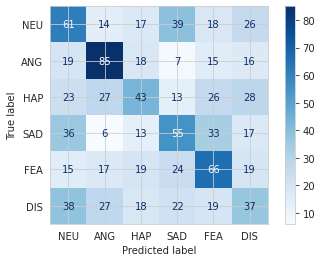

accuracy = 0.3555327868852459


In [16]:
X_train_new95 = X_train.copy()
X_test_new95  = X_test.copy()

pca95 = PCA(n_components = .95)
pca95.fit(X_train)

X_train_transform95 = pca95.transform(X_train_new95)
X_test_transform95  = pca95.transform(X_test_new95)

print(len(X_train_transform95[0]))

for i in range (len(X_train_transform95[0])):
    X_train_new95["comp_" + str(i+1)] = X_train_transform95[:,i]
    X_test_new95 ["comp_" + str(i+1)] = X_test_transform95[:,i]

X_train_sub95  = X_train_new95.iloc[: , -(len(X_train_transform95[0])+1):]
X_test_sub95   = X_test_new95.iloc[: , -(len(X_test_transform95[0])+1):]    

# Build pipeline to first scale the mid feature data, then apply the SVC

pipe95 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier95 = pipe95.fit(X_train_sub95, y_train)
pred95       = pipe95.predict(X_test_sub95)    

# Look at the confusion matrix for the test data :
cnf_matrix_test95 = confusion_matrix(y_test, pred95)

print("for PCA n_components = 0.95")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test95)
print()

# Look at the confusion matrix for the training data:
pred_train95       = pipe95.predict(X_train_sub95)
cnf_matrix_train95 = confusion_matrix(y_train, pred_train95)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train95)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier95, X_test_sub95, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

acc95 = np.diag(cnf_matrix_test95).sum()/cnf_matrix_test95.sum() 
print("accuracy =", acc95)

8


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for PCA n_components = 0.9
confusion matrix for all six emotions of the test set is:
[[69 20 22 31 16 17]
 [27 88 17  5  9 14]
 [24 38 34 15 28 21]
 [52  9  5 53 33  8]
 [29 26 21 21 51 12]
 [37 36 20 30 14 24]]

confusion matrix for all six emotions of the train set is:
[[377  47  47 100  58  68]
 [ 86 387  59  27  35  47]
 [108 151 207  56  71  48]
 [151  34  45 311  59  40]
 [ 75  77  81  94 281  33]
 [153 114  63  95  61 154]]


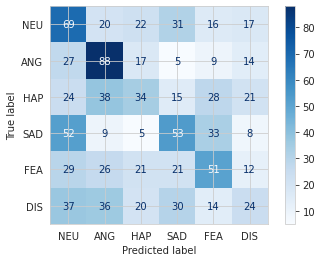

accuracy = 0.32684426229508196


In [17]:
X_train_new90 = X_train.copy()
X_test_new90  = X_test.copy()

pca90 = PCA(n_components = .9)
pca90.fit(X_train)

X_train_transform90 = pca90.transform(X_train_new90)
X_test_transform90  = pca90.transform(X_test_new90)

print(len(X_train_transform90[0]))

for i in range (len(X_train_transform90[0])):
    X_train_new90["comp_" + str(i+1)] = X_train_transform90[:,i]
    X_test_new90 ["comp_" + str(i+1)] = X_test_transform90[:,i]

X_train_sub90  = X_train_new90.iloc[: , -(len(X_train_transform90[0])+1):]
X_test_sub90  = X_test_new90.iloc[: , -(len(X_test_transform90[0])+1):]    

# Build pipeline to first scale the mid feature data, then apply the SVC

pipe90 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier90 = pipe90.fit(X_train_sub90, y_train)
pred90       = pipe90.predict(X_test_sub90)    

# Look at the confusion matrix for the test data :
cnf_matrix_test90 = confusion_matrix(y_test, pred90)

print("for PCA n_components = 0.9")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test90)
print()

# Look at the confusion matrix for the training data:
pred_train90       = pipe90.predict(X_train_sub90)
cnf_matrix_train90 = confusion_matrix(y_train, pred_train90)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train90)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier90, X_test_sub90, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

acc90 = np.diag(cnf_matrix_test90).sum()/cnf_matrix_test90.sum() 
print("accuracy =", acc90)

5


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for PCA n_components = 0.85
confusion matrix for all six emotions of the test set is:
[[80 21 12 28 24 10]
 [33 84 13  7 17  6]
 [47 31 13  9 40 20]
 [46 21 11 27 43 12]
 [23 27 11 28 55 16]
 [46 43 14 17 23 18]]

confusion matrix for all six emotions of the train set is:
[[321 100  48  84  98  46]
 [ 99 351  44  26  76  45]
 [156 153 113  65 106  48]
 [156  73  43 210 112  46]
 [102 105  49  91 262  32]
 [154 149  53  74  77 133]]


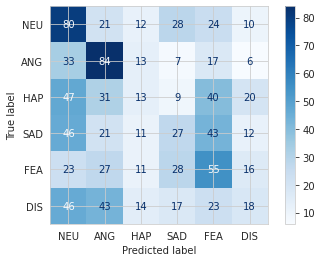

accuracy = 0.2838114754098361


In [18]:
X_train_new85 = X_train.copy()
X_test_new85  = X_test.copy()

pca85 = PCA(n_components = .85)
pca85.fit(X_train)

X_train_transform85 = pca85.transform(X_train_new85)
X_test_transform85  = pca85.transform(X_test_new85)

print(len(X_train_transform85[0]))

for i in range (len(X_train_transform85[0])):
    X_train_new85["comp_" + str(i+1)] = X_train_transform85[:,i]
    X_test_new85 ["comp_" + str(i+1)] = X_test_transform85[:,i]

X_train_sub85  = X_train_new85.iloc[: , -(len(X_train_transform85[0])+1):]
X_test_sub85  = X_test_new85.iloc[: , -(len(X_test_transform85[0])+1):]    

# Build pipeline to first scale the mid feature data, then apply the SVC

pipe85 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier85 = pipe85.fit(X_train_sub85, y_train)
pred85       = pipe85.predict(X_test_sub85)    

# Look at the confusion matrix for the test data :
cnf_matrix_test85 = confusion_matrix(y_test, pred85)

print("for PCA n_components = 0.85")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test85)
print()

# Look at the confusion matrix for the training data:
pred_train85       = pipe85.predict(X_train_sub85)
cnf_matrix_train85 = confusion_matrix(y_train, pred_train85)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train85)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier85, X_test_sub85, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

acc85 = np.diag(cnf_matrix_test85).sum()/cnf_matrix_test85.sum() 
print("accuracy =", acc85)

In [19]:

FP100 = cnf_matrix_test100.sum(axis=0) - np.diag(cnf_matrix_test100) 
FN100 = cnf_matrix_test100.sum(axis=1) - np.diag(cnf_matrix_test100)
TP100 = np.diag(cnf_matrix_test100)
TN100 = cnf_matrix_test100.sum() - (FP100 + FN100 + TP100)


FP95 = cnf_matrix_test95.sum(axis=0) - np.diag(cnf_matrix_test95) 
FN95 = cnf_matrix_test95.sum(axis=1) - np.diag(cnf_matrix_test95)
TP95 = np.diag(cnf_matrix_test95)
TN95 = cnf_matrix_test95.sum() - (FP95 + FN95 + TP95)

FP90 = cnf_matrix_test90.sum(axis=0) - np.diag(cnf_matrix_test90) 
FN90 = cnf_matrix_test90.sum(axis=1) - np.diag(cnf_matrix_test90)
TP90 = np.diag(cnf_matrix_test90)
TN90 = cnf_matrix_test90.sum() - (FP90 + FN90 + TP90)

FP85 = cnf_matrix_test85.sum(axis=0) - np.diag(cnf_matrix_test85) 
FN85 = cnf_matrix_test85.sum(axis=1) - np.diag(cnf_matrix_test85)
TP85 = np.diag(cnf_matrix_test85)
TN85 = cnf_matrix_test85.sum() - (FP85 + FN85 + TP85)

acc100 = np.diag(cnf_matrix_test100).sum()/cnf_matrix_test100.sum() 
acc95 = np.diag(cnf_matrix_test95).sum()/cnf_matrix_test95.sum() 
acc90 = np.diag(cnf_matrix_test90).sum()/cnf_matrix_test90.sum() 
acc85 = np.diag(cnf_matrix_test85).sum()/cnf_matrix_test85.sum() 

recall100 = TP100/(TP100 + FN100)
recall95 = TP95/(TP95 + FN95)
recall90 = TP90/(TP90 + FN90)
recall85 = TP85/(TP85 + FN85)

print("accuracy with 100% variance of data  =", acc100)
print("accuracy with 95% variance of data =", acc95)
print("accuracy with 90% variance of data =", acc90)
print("accuracy with 85% variance of data =", acc85)

print()

print("recall with 100% variance of data  =", recall100)
print("recall with 95% variance of data =",recall95)
print("recall with 90% variance of data =",recall90)
print("recall with 85% variance of data =",recall85)


accuracy with 100% variance of data  = 0.39651639344262296
accuracy with 95% variance of data = 0.3555327868852459
accuracy with 90% variance of data = 0.32684426229508196
accuracy with 85% variance of data = 0.2838114754098361

recall with 100% variance of data  = [0.47428571 0.55625    0.2625     0.41875    0.4        0.26086957]
recall with 95% variance of data = [0.34857143 0.53125    0.26875    0.34375    0.4125     0.22981366]
recall with 90% variance of data = [0.39428571 0.55       0.2125     0.33125    0.31875    0.14906832]
recall with 85% variance of data = [0.45714286 0.525      0.08125    0.16875    0.34375    0.11180124]


In [20]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

NameError: name 'FP' is not defined

In [ ]:
ACC